In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import matplotlib.pyplot as plt

import torch
from paintbyword import StyleganPainter
from paintbyword.utils import show, pilim

# Notebook magic
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Instantiate a painter

In [2]:
painter = StyleganPainter(pretrained='birds')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [on]
Loading model from: /home/andonian/anaconda3/envs/paintbyword/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


#### Perform freeform painting

1. Select a seed image index (can try different indices for different results).
2. Provide the natural language description.
3. Provide optimization method: `cma + adam` first performs CMA optimization followed by gradient optization using the Adam optimizer.


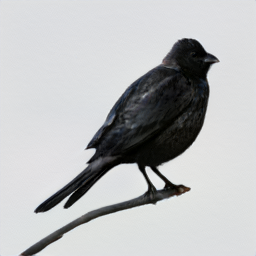
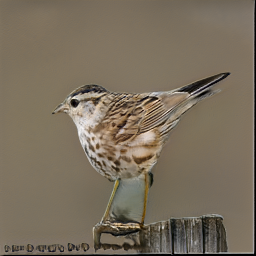
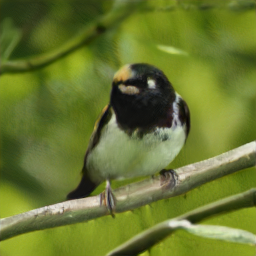
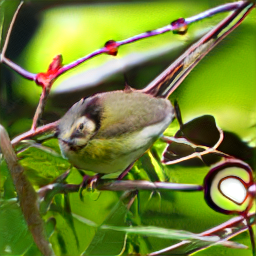
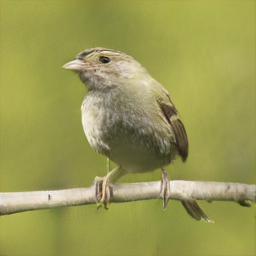
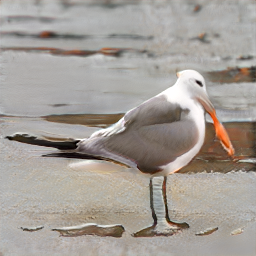
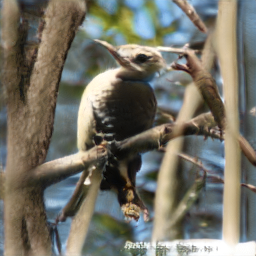
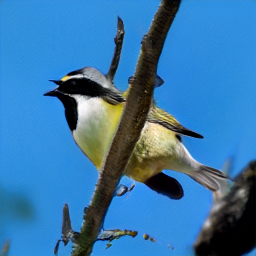

In [3]:
# Display grid of seed images to choose from
painter.show_seed_images(batch_size=8)

In [11]:
choice = 4
result = painter.paint(choice, 'A photo of a yellow bird with black colored wings', optim_method='cma + adam')

(25_w,50)-aCMA-ES (mu_w=14.0,w_1=14%) in dimension 512 (seed=1, Sat Jan 15 22:18:58 2022)


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

### View output image


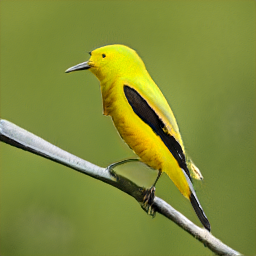

In [12]:
z, image, loss_history, im_history = result
show(pilim(image[0]))

#### Plot the CLIP loss trajectory over the course of optimization.

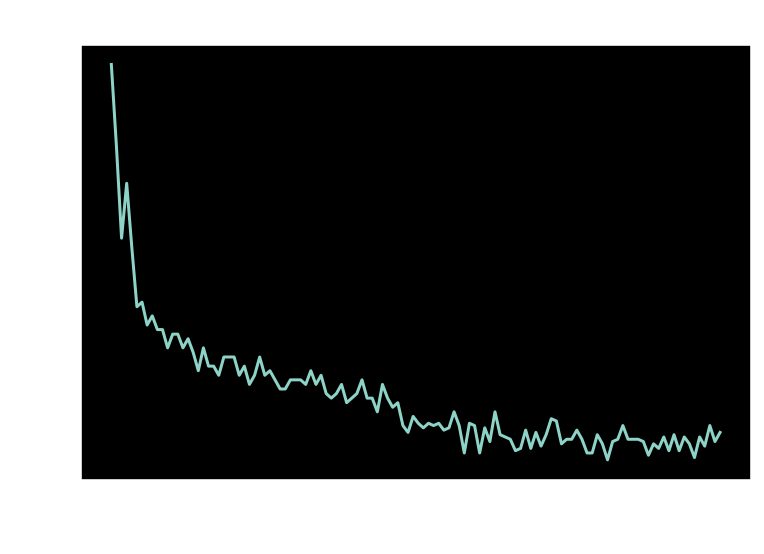

In [13]:
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss history')
plt.show()

#### Save the painting history to visualize the optimization process.

In [14]:
# Save a video of the painting history
import imageio
video_out_name = 'paintbyword_stylegan2_birds_video.mp4'
out_images = [pilim(im) for im in im_history]
imageio.mimsave(video_out_name, out_images, fps=5)

# Show the video
from IPython.display import Video
Video(video_out_name)